__Purpose:__ Run FedAvg but with different hyperparameters.  Mainly:
1. C (GLOBAL): Fraction of clients used in training
1. local_round_thresh (LOCAL): probably should lower since local cost seems to reach zero super early... and also only advances one update?
 - Had very little effect... not what I had hoped.  Why not?
1. smoothbatch (SHARED)
1. PCA_comps (SHARED)
1. num_steps (SHARED)

## Client

def __init__(self, ID, w, method, local_data, data_stream, smoothbatch=1, current_round=0, PCA_comps=7, availability=1, global_method='FedAvg', normalize_dec=False, normalize_EMG=True, track_cost_components=True, track_lr_comps=True, use_real_hess=True, gradient_clipping=False, log_decs=True, clipping_threshold=100, tol=1e-10, adaptive=True, eta=1, track_gradient=True, num_steps=1, input_eta=False, safe_lr_factor=False, mix_in_num_steps=False, mix_mixed_SB=False, delay_scaling=5, random_delays=False, download_delay=1, upload_delay=1, local_round_threshold=50, condition_number=1, verbose=False):

## Server

def __init__(self, ID, D0, method, all_clients, smoothbatch=1, C=0.1, normalize_dec=True, current_round=0, PCA_comps=7, verbose=False, num_steps=10)

Server and client share smoothbatch, normalize_dec (THIS IS STILL TRUE BY DEFAULT ON SERVER!!!!), PCA_comps, and num_steps (THEY ARE SET TO DIFFERENT DEFAULTS!!!)

In [1]:
import pandas as pd
import os
import numpy as np
import random
from matplotlib import pyplot as plt
from scipy.optimize import minimize
import copy

from experiment_params import *
from cost_funcs import *
from fl_sim_classes import *
import time
import pickle
from sklearn.decomposition import PCA

In [2]:
path = r'C:\Users\kdmen\Desktop\Research\personalization-privacy-risk\Data'
cond0_filename = r'\cond0_dict_list.p'
all_decs_init_filename = r'\all_decs_init.p'
nofl_decs_filename = r'\nofl_decs.p'
id2color = {0:'lightcoral', 1:'maroon', 2:'chocolate', 3:'darkorange', 4:'gold', 5:'olive', 6:'olivedrab', 
            7:'lawngreen', 8:'aquamarine', 9:'deepskyblue', 10:'steelblue', 11:'violet', 12:'darkorchid', 13:'deeppink'}
implemented_client_training_methods = ['EtaGradStep', 'EtaScipyMinStep', 'FullScipyMinStep']
implement_these_methods_next = ['APFL', 'AFL', 'PersA_FL_MAML', 'PersA_FL_ME', 'PFA']
num_participants = 14

In [3]:
with open(path+cond0_filename, 'rb') as fp:
    cond0_training_and_labels_lst = pickle.load(fp)
    
with open(path+all_decs_init_filename, 'rb') as fp:
    init_decoders = pickle.load(fp)
cond0_init_decs = [dec[0, :, :] for dec in init_decoders]

In [4]:
D_0 = np.random.rand(2,64)
D_0_7 = np.random.rand(2,7)
big_loop_iters = 500
med_loop_iters = 500

run_all=True

In [5]:
if run_all:
    pass
else:
    assert(1==0)

# All Default Values (Baseline)

In [6]:
user_default = [Client(i, D_0_7, 'EtaScipyMinStep', cond0_training_and_labels_lst[i], 'streaming', delay_scaling=0) for i in range(14)]
global_default = Server(1, D_0_7, 'FedAvg', user_default)

for i in range(med_loop_iters):
    global_default.execute_FL_loop()

# Federated Learning, FedAvg, 1 Scipy Step
> 1000 Iterations <br>
> Note that the thicker, lighter lines are the global model accuracies, whereas the thin lines are the local accuracies. <br>
> In the original FL FedAvg paper by McMahan 17, they varied the learning rate from {3, 6, 9, 18}

# Learning Rate
> Default: lr=1
## LR = 0.01

In [7]:
lr = 0.01

user_lr01 = [Client(i, D_0_7, 'EtaScipyMinStep', cond0_training_and_labels_lst[i], 'streaming', eta=lr, delay_scaling=0) for i in range(14)]
global_lr01 = Server(1, D_0_7, 'FedAvg', user_lr01)

for i in range(med_loop_iters):
    global_lr01.execute_FL_loop()

## LR = 0.0001

In [8]:
lr = 0.0001

user_lr0001 = [Client(i, D_0_7, 'EtaScipyMinStep', cond0_training_and_labels_lst[i], 'streaming', eta=lr, delay_scaling=0) for i in range(14)]
global_lr0001 = Server(1, D_0_7, 'FedAvg', user_lr0001)

for i in range(med_loop_iters):
    global_lr0001.execute_FL_loop()

## LR = 3

In [9]:
lr = 3

user_lr3 = [Client(i, D_0_7, 'EtaScipyMinStep', cond0_training_and_labels_lst[i], 'streaming', eta=lr, delay_scaling=0) for i in range(14)]
global_lr3 = Server(1, D_0_7, 'FedAvg', user_lr3)

for i in range(med_loop_iters):
    global_lr3.execute_FL_loop()

## LR = 9

In [10]:
lr = 9

user_lr9 = [Client(i, D_0_7, 'EtaScipyMinStep', cond0_training_and_labels_lst[i], 'streaming', eta=lr, delay_scaling=0) for i in range(14)]
global_lr9 = Server(1, D_0_7, 'FedAvg', user_lr9)

for i in range(med_loop_iters):
    global_lr9.execute_FL_loop()

## LR = 18

In [11]:
lr = 18

user_lr18 = [Client(i, D_0_7, 'EtaScipyMinStep', cond0_training_and_labels_lst[i], 'streaming', eta=lr, delay_scaling=0) for i in range(14)]
global_lr18 = Server(1, D_0_7, 'FedAvg', user_lr18)

for i in range(med_loop_iters):
    global_lr18.execute_FL_loop()

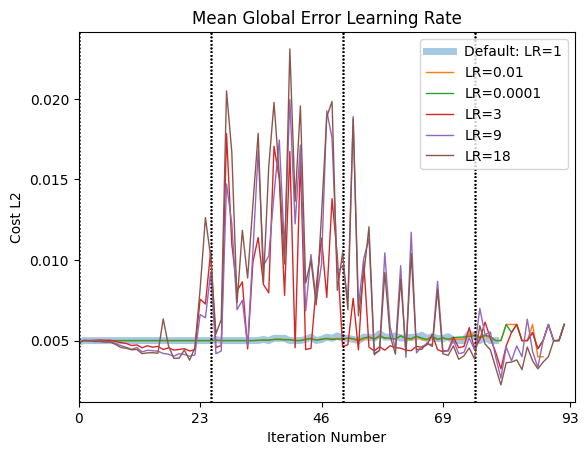

In [66]:
lr_users, lr_dfs, lr_vecs = central_tendency_plotting([user_default, user_lr01, user_lr0001, user_lr3, user_lr9, user_lr18], 
                                                      local_error=False,
                                                      highlight_default=True,
                                                      iterable_labels=['Default: LR=1', 'LR=0.01', 'LR=0.0001', 'LR=3', 'LR=9', 'LR=18'], 
                                                      dim_reduc_factor=1, custom_title='Mean Global Error Learning Rate')

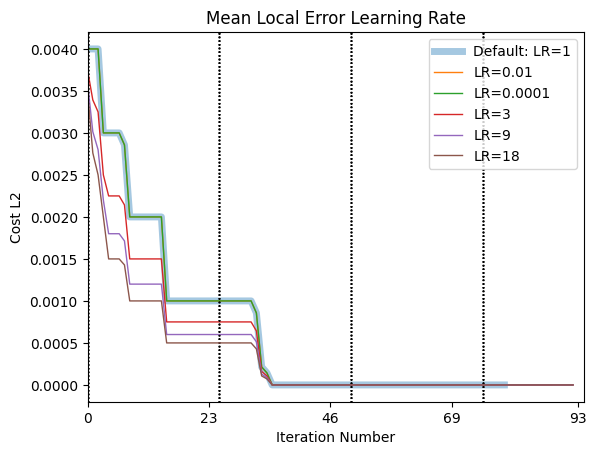

In [13]:
lr_users, lr_dfs, lr_vecs = central_tendency_plotting([user_default, user_lr01, user_lr0001, user_lr3, user_lr9, user_lr18], 
                                                      highlight_default=True,
                                                      global_error=False, 
                                                      iterable_labels=['Default: LR=1', 'LR=0.01', 'LR=0.0001', 'LR=3', 'LR=9', 'LR=18'], 
                                                      dim_reduc_factor=1, custom_title='Mean Local Error Learning Rate')

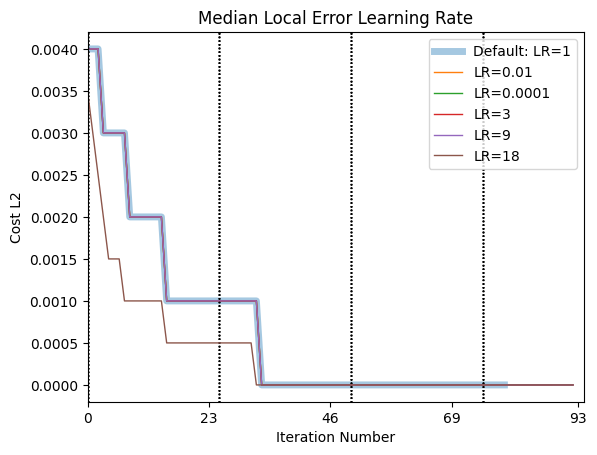

In [14]:
lr_users, lr_dfs, lr_vecs = central_tendency_plotting([user_default, user_lr01, user_lr0001, user_lr3, user_lr9, user_lr18], 
                                                      highlight_default=True,
                                                      global_error=False, 
                                                      plot_mean=False, 
                                                      plot_median=True, 
                                                      iterable_labels=['Default: LR=1', 'LR=0.01', 'LR=0.0001', 'LR=3', 'LR=9', 'LR=18'], 
                                                      dim_reduc_factor=1, custom_title='Median Local Error Learning Rate')

In [15]:
if run_all:
    pass
else:
    assert(1==0)

# Decoder Normalization
> Should I also break up the server dec normalization and test the effects of when you normalize (eg normalizing each client before aggregation vs just normalizing the aggregated vals)?  What do the differences imply?
## Interesting Performance Difference When Turn Off All Dec Normalization
> Global and local models converge together. Is this better performance?

In [16]:
user_noDnorms = [Client(i, D_0_7, 'EtaScipyMinStep', cond0_training_and_labels_lst[i], 'streaming', delay_scaling=0) for i in range(14)]
global_noDnorms = Server(1, D_0_7, 'FedAvg', user_noDnorms, normalize_dec=False)

for i in range(big_loop_iters):
    global_noDnorms.execute_FL_loop()

## Let's look at when you normalize both in the client and server
> Performance is higher and does not go to zero even though it is ~1e-3 OOM.  Appears worse than just global normalization

In [17]:
user_bothDnorm = [Client(i, D_0_7, 'EtaScipyMinStep', cond0_training_and_labels_lst[i], 'streaming', delay_scaling=0, normalize_dec=True) for i in range(14)]
global_bothDnorm = Server(1, D_0_7, 'FedAvg', user_bothDnorm, normalize_dec=True)

for i in range(big_loop_iters):
    global_bothDnorm.execute_FL_loop()

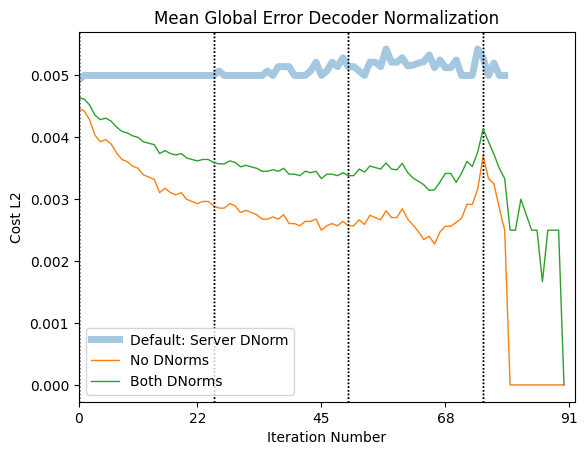

In [65]:
Dnorm_users, Dnorm_dfs, Dnorm_vecs = central_tendency_plotting([user_default, user_noDnorms, user_bothDnorm], 
                                                      highlight_default=True,
                                                      local_error=False,
                                                      iterable_labels=['Default: Server DNorm', 'No DNorms', 'Both DNorms'], 
                                                      dim_reduc_factor=1, custom_title='Mean Global Error Decoder Normalization')

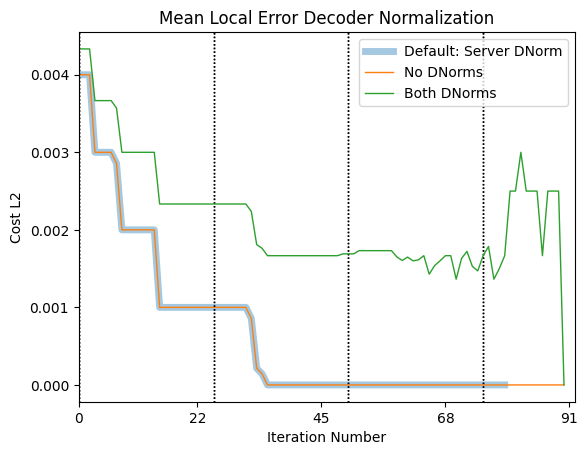

In [19]:
Dnorm_users, Dnorm_dfs, Dnorm_vecs = central_tendency_plotting([user_default, user_noDnorms, user_bothDnorm], 
                                                      highlight_default=True,
                                                      global_error=False, 
                                                      iterable_labels=['Default: Server DNorm', 'No DNorms', 'Both DNorms'], 
                                                      dim_reduc_factor=1, custom_title='Mean Local Error Decoder Normalization')

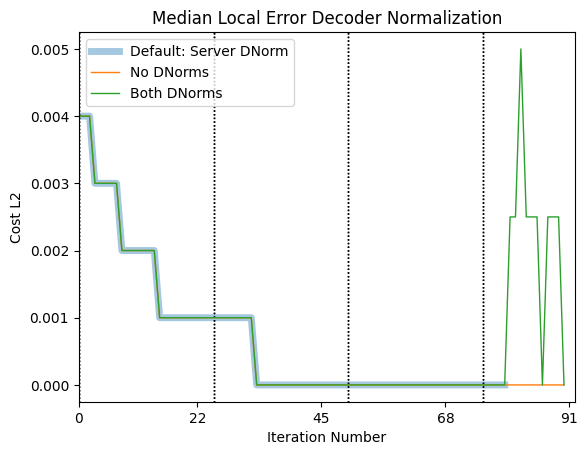

In [20]:
Dnorm_users, Dnorm_dfs, Dnorm_vecs = central_tendency_plotting([user_default, user_noDnorms, user_bothDnorm], 
                                                      global_error=False, 
                                                      highlight_default=True,
                                                      plot_mean=False, 
                                                      plot_median=True, 
                                                      iterable_labels=['Default: Server DNorm', 'No DNorms', 'Both DNorms'], 
                                                      dim_reduc_factor=1, custom_title='Median Local Error Decoder Normalization')

In [21]:
if run_all:
    pass
else:
    assert(1==0)

# Varying PCA_comps
> Default: PCA_comps=7

## PCA_comps=10

In [22]:
my_PCAs = 10

user_pca10 = [Client(i, D_0_7, 'EtaScipyMinStep', cond0_training_and_labels_lst[i], 'streaming', delay_scaling=0, PCA_comps=my_PCAs, verbose=True) for i in range(14)]
global_pca10 = Server(1, D_0_7, 'FedAvg', user_pca10, PCA_comps=my_PCAs)

for i in range(big_loop_iters):
    global_pca10.execute_FL_loop()

Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 10)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 10)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 10)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 10)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 10)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 10)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 10)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 10)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 10)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 10)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 10)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 10)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 10)
Class BaseModel: Overwrote the provided init decode

## PCA_comps=12

In [23]:
my_PCAs = 12

user_pca12 = [Client(i, D_0_7, 'EtaScipyMinStep', cond0_training_and_labels_lst[i], 'streaming', delay_scaling=0, PCA_comps=my_PCAs, verbose=True) for i in range(14)]
global_pca12 = Server(1, D_0_7, 'FedAvg', user_pca12, PCA_comps=my_PCAs)

for i in range(big_loop_iters):
    global_pca12.execute_FL_loop()

Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 12)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 12)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 12)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 12)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 12)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 12)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 12)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 12)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 12)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 12)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 12)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 12)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 12)
Class BaseModel: Overwrote the provided init decode

## PCA_comps=5

In [24]:
my_PCAs = 5

user_pca5 = [Client(i, D_0_7, 'EtaScipyMinStep', cond0_training_and_labels_lst[i], 'streaming', delay_scaling=0, PCA_comps=my_PCAs, verbose=True) for i in range(14)]
global_pca5 = Server(1, D_0_7, 'FedAvg', user_pca5, PCA_comps=my_PCAs)

for i in range(big_loop_iters):
    global_pca5.execute_FL_loop()

Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 5)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 5)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 5)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 5)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 5)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 5)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 5)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 5)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 5)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 5)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 5)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 5)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 5)
Class BaseModel: Overwrote the provided init decoder: (2, 7) -->

## PCA_comps=3

In [25]:
my_PCAs = 3

user_pca3 = [Client(i, D_0_7, 'EtaScipyMinStep', cond0_training_and_labels_lst[i], 'streaming', delay_scaling=0, PCA_comps=my_PCAs, verbose=True) for i in range(14)]
global_pca3 = Server(1, D_0_7, 'FedAvg', user_pca3, PCA_comps=my_PCAs)

for i in range(big_loop_iters):
    global_pca3.execute_FL_loop()

Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 3)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 3)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 3)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 3)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 3)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 3)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 3)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 3)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 3)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 3)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 3)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 3)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 3)
Class BaseModel: Overwrote the provided init decoder: (2, 7) -->

## PCA_comps=1

In [26]:
my_PCAs = 1

user_pca1 = [Client(i, D_0_7, 'EtaScipyMinStep', cond0_training_and_labels_lst[i], 'streaming', delay_scaling=0, PCA_comps=my_PCAs, verbose=True) for i in range(14)]
global_pca1 = Server(1, D_0_7, 'FedAvg', user_pca1, PCA_comps=my_PCAs)

for i in range(big_loop_iters):
    global_pca1.execute_FL_loop()

Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 1)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 1)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 1)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 1)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 1)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 1)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 1)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 1)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 1)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 1)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 1)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 1)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 1)
Class BaseModel: Overwrote the provided init decoder: (2, 7) -->

## PCA_comps=64
> Eg no PCA

In [27]:
my_PCAs = 64

user_nopca = [Client(i, D_0_7, 'EtaScipyMinStep', cond0_training_and_labels_lst[i], 'streaming', delay_scaling=0, PCA_comps=my_PCAs, verbose=True) for i in range(14)]
global_nopca = Server(1, D_0_7, 'FedAvg', user_nopca, PCA_comps=my_PCAs)

for i in range(big_loop_iters):
    global_nopca.execute_FL_loop()

Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 64)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 64)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 64)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 64)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 64)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 64)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 64)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 64)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 64)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 64)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 64)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 64)
Class BaseModel: Overwrote the provided init decoder: (2, 7) --> (2, 64)
Class BaseModel: Overwrote the provided init decode

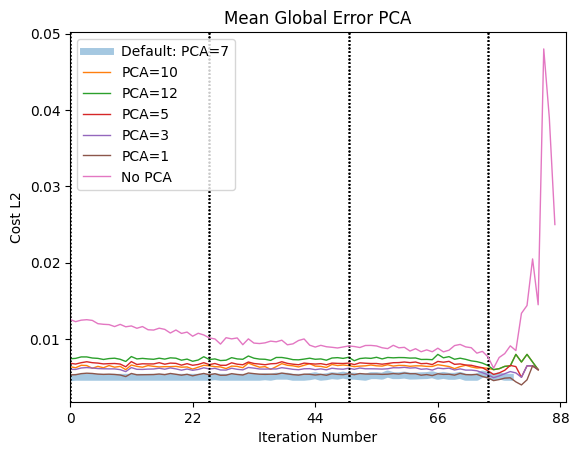

In [64]:
pca_users, pca_dfs, pca_vecs = central_tendency_plotting([user_default, user_pca10, user_pca12, user_pca5, user_pca3, user_pca1, user_nopca], 
                                                      highlight_default=True,
                                                      local_error=False,
                                                      iterable_labels=['Default: PCA=7', 'PCA=10', 'PCA=12', 'PCA=5', 'PCA=3', 'PCA=1', 'No PCA'], 
                                                      dim_reduc_factor=1, custom_title='Mean Global Error PCA')

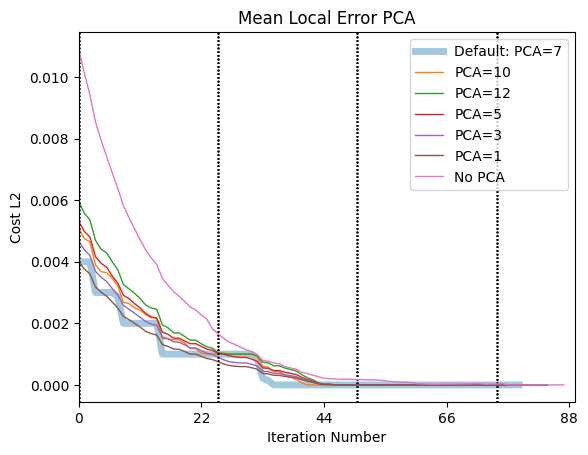

In [29]:
pca_users, pca_dfs, pca_vecs = central_tendency_plotting([user_default, user_pca10, user_pca12, user_pca5, user_pca3, user_pca1, user_nopca], 
                                                      highlight_default=True,
                                                      global_error=False, 
                                                      iterable_labels=['Default: PCA=7', 'PCA=10', 'PCA=12', 'PCA=5', 'PCA=3', 'PCA=1', 'No PCA'], 
                                                      dim_reduc_factor=1, custom_title='Mean Local Error PCA')

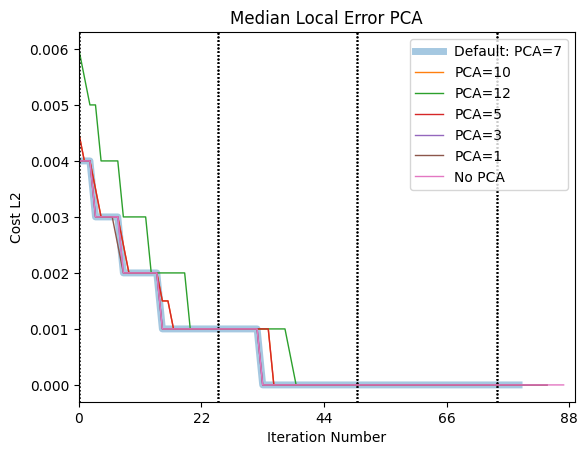

In [30]:
pca_users, pca_dfs, pca_vecs = central_tendency_plotting([user_default, user_pca10, user_pca12, user_pca5, user_pca3, user_pca1, user_nopca], 
                                                      global_error=False, 
                                                      plot_mean=False, 
                                                      plot_median=True, 
                                                      highlight_default=True,
                                                      iterable_labels=['Default: PCA=7', 'PCA=10', 'PCA=12', 'PCA=5', 'PCA=3', 'PCA=1', 'No PCA'], 
                                                      dim_reduc_factor=1, custom_title='Median Local Error PCA')

In [31]:
if run_all:
    pass
else:
    assert(1==0)

# Varying C (frac of clients used per round)
> Default: c=0.1

## C=0.25

In [32]:
my_C = 0.25

user_c025 = [Client(i, D_0_7, 'EtaScipyMinStep', cond0_training_and_labels_lst[i], 'streaming', delay_scaling=0, verbose=True) for i in range(14)]
global_c025 = Server(1, D_0_7, 'FedAvg', user_c025, C=my_C)

for i in range(big_loop_iters):
    global_c025.execute_FL_loop()

Client 1: New update after lrt passed: (new update, current global round, current local round): (11, 0, 25)

Client 1: New update after lrt passed: (new update, current global round, current local round): (12, 0, 50)

Client 1: New update after lrt passed: (new update, current global round, current local round): (13, 0, 75)

Client 1: New update after lrt passed: (new update, current global round, current local round): (14, 0, 100)

Client 1: New update after lrt passed: (new update, current global round, current local round): (15, 0, 125)



## C=0.5

In [33]:
my_C = 0.5

user_c05 = [Client(i, D_0_7, 'EtaScipyMinStep', cond0_training_and_labels_lst[i], 'streaming', delay_scaling=0, verbose=True) for i in range(14)]
global_c05 = Server(1, D_0_7, 'FedAvg', user_c05, C=my_C)

for i in range(big_loop_iters):
    global_c05.execute_FL_loop()

Client 1: New update after lrt passed: (new update, current global round, current local round): (11, 0, 25)

Client 1: New update after lrt passed: (new update, current global round, current local round): (12, 0, 50)

Client 1: New update after lrt passed: (new update, current global round, current local round): (13, 0, 75)

Client 1: New update after lrt passed: (new update, current global round, current local round): (14, 0, 100)

Client 1: New update after lrt passed: (new update, current global round, current local round): (15, 0, 125)

Client 1: New update after lrt passed: (new update, current global round, current local round): (16, 0, 150)



## C=0.75

In [34]:
my_C = 0.75

user_c075 = [Client(i, D_0_7, 'EtaScipyMinStep', cond0_training_and_labels_lst[i], 'streaming', delay_scaling=0, verbose=True) for i in range(14)]
global_c075 = Server(1, D_0_7, 'FedAvg', user_c075, C=my_C)

for i in range(big_loop_iters):
    global_c075.execute_FL_loop()

Client 1: New update after lrt passed: (new update, current global round, current local round): (11, 0, 25)

Client 1: New update after lrt passed: (new update, current global round, current local round): (12, 0, 50)

Client 1: New update after lrt passed: (new update, current global round, current local round): (13, 0, 75)

Client 1: New update after lrt passed: (new update, current global round, current local round): (14, 0, 100)

Client 1: New update after lrt passed: (new update, current global round, current local round): (15, 0, 125)

Client 1: New update after lrt passed: (new update, current global round, current local round): (16, 0, 150)



## C=1
> This one has 500 iterations since if the global server runs 500 iterations and everyone is included (C=1) then all users (for that trial) will have 500 local iterations as well

In [35]:
my_C = 1

user_c1 = [Client(i, D_0_7, 'EtaScipyMinStep', cond0_training_and_labels_lst[i], 'streaming', delay_scaling=0, verbose=True) for i in range(14)]
global_c1 = Server(1, D_0_7, 'FedAvg', user_c1, C=my_C)

for i in range(big_loop_iters):
    global_c1.execute_FL_loop()

Client 1: New update after lrt passed: (new update, current global round, current local round): (11, 0, 25)

Client 1: New update after lrt passed: (new update, current global round, current local round): (12, 0, 50)

Client 1: New update after lrt passed: (new update, current global round, current local round): (13, 0, 75)

Client 1: New update after lrt passed: (new update, current global round, current local round): (14, 0, 100)

Client 1: New update after lrt passed: (new update, current global round, current local round): (15, 0, 125)

Client 1: New update after lrt passed: (new update, current global round, current local round): (16, 0, 150)



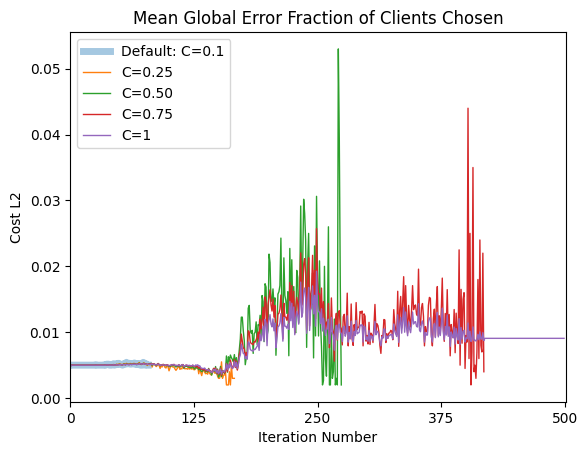

In [63]:
c_users, c_dfs, c_vecs = central_tendency_plotting([user_default, user_c025, user_c05, user_c075, user_c1], 
                                                      highlight_default=True,
                                                      local_error=False,
                                                      show_update_change=False, 
                                                      iterable_labels=['Default: C=0.1', 'C=0.25', 'C=0.50', 'C=0.75', 'C=1'], 
                                                      dim_reduc_factor=1, custom_title='Mean Global Error Fraction of Clients Chosen')

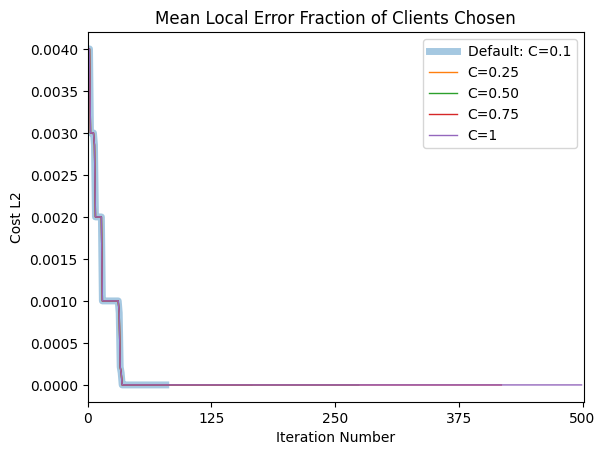

In [37]:
c_users, c_dfs, c_vecs = central_tendency_plotting([user_default, user_c025, user_c05, user_c075, user_c1], 
                                                      highlight_default=True,
                                                      show_update_change=False, 
                                                      global_error=False, 
                                                      iterable_labels=['Default: C=0.1', 'C=0.25', 'C=0.50', 'C=0.75', 'C=1'], 
                                                      dim_reduc_factor=1, custom_title='Mean Local Error Fraction of Clients Chosen')

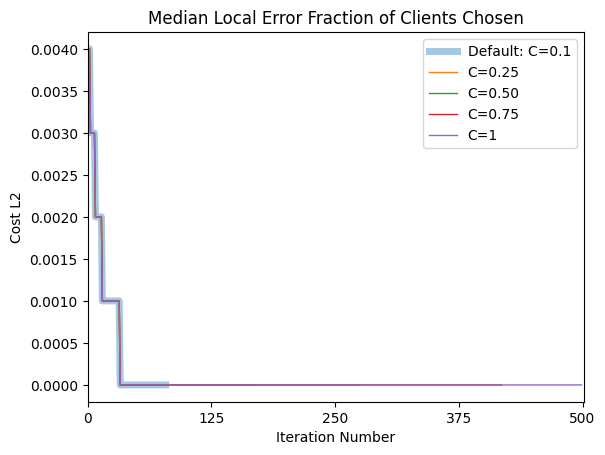

In [38]:
c_users, c_dfs, c_vecs = central_tendency_plotting([user_default, user_c025, user_c05, user_c075, user_c1], 
                                                      global_error=False,
                                                      highlight_default=True,
                                                      show_update_change=False, 
                                                      plot_mean=False, 
                                                      plot_median=True, 
                                                      iterable_labels=['Default: C=0.1', 'C=0.25', 'C=0.50', 'C=0.75', 'C=1'], 
                                                      dim_reduc_factor=1, custom_title='Median Local Error Fraction of Clients Chosen')

In [39]:
if run_all:
    pass
else:
    assert(1==0)

# Varying local_round_thresh
## Default: 50

In [40]:
reduced_limit=50
# ^ Actually not reduced, this is the default

user_lrt50 = [Client(i, D_0_7, 'EtaScipyMinStep', cond0_training_and_labels_lst[i], 'streaming', delay_scaling=0, verbose=True) for i in range(14)]
global_lrt50 = Server(1, D_0_7, 'FedAvg', user_lrt50)

for i in range(big_loop_iters):
    global_lrt50.execute_FL_loop()
    
print("(Current Local Round, Current Local Update)")
for my_client in global_lrt50.all_clients:
    print((my_client.current_round, my_client.current_update))

Client 1: New update after lrt passed: (new update, current global round, current local round): (11, 0, 25)

Client 1: New update after lrt passed: (new update, current global round, current local round): (12, 0, 50)

Client 1: New update after lrt passed: (new update, current global round, current local round): (13, 0, 75)

(Current Local Round, Current Local Update)
(69, 12)
(76, 13)
(71, 12)
(69, 12)
(60, 12)
(73, 12)
(65, 12)
(85, 13)
(62, 12)
(74, 12)
(67, 12)
(88, 13)
(80, 13)
(61, 12)


## local_round_thresh=25

In [41]:
reduced_limit = 25

user_lrt25 = [Client(i, D_0_7, 'EtaScipyMinStep', cond0_training_and_labels_lst[i], 'streaming',  local_round_threshold=reduced_limit, delay_scaling=0, verbose=True) for i in range(14)]
global_lrt25 = Server(1, D_0_7, 'FedAvg', user_lrt25)

for i in range(big_loop_iters):
    global_lrt25.execute_FL_loop()
    
print("(Current Local Round, Current Local Update)")
for my_client in global_lrt25.all_clients:
    print((my_client.current_round, my_client.current_update))

Client 1: New update after lrt passed: (new update, current global round, current local round): (11, 0, 25)

Client 1: New update after lrt passed: (new update, current global round, current local round): (12, 0, 50)

Client 1: New update after lrt passed: (new update, current global round, current local round): (13, 0, 75)

(Current Local Round, Current Local Update)
(56, 12)
(77, 13)
(72, 12)
(73, 12)
(74, 12)
(72, 12)
(69, 12)
(85, 13)
(69, 12)
(62, 12)
(76, 13)
(60, 12)
(67, 12)
(88, 13)


## local_round_thresh=10

In [42]:
reduced_limit = 10

user_lrt10 = [Client(i, D_0_7, 'EtaScipyMinStep', cond0_training_and_labels_lst[i], 'streaming',  local_round_threshold=reduced_limit, delay_scaling=0, verbose=True) for i in range(14)]
global_lrt10 = Server(1, D_0_7, 'FedAvg', user_lrt10)

for i in range(big_loop_iters):
    global_lrt10.execute_FL_loop()
    
print("(Current Local Round, Current Local Update)")
for my_client in global_lrt10.all_clients:
    print((my_client.current_round, my_client.current_update))

Client 1: New update after lrt passed: (new update, current global round, current local round): (11, 0, 10)

Client 1: New update after lrt passed: (new update, current global round, current local round): (12, 0, 20)

Client 1: New update after lrt passed: (new update, current global round, current local round): (13, 0, 30)

Client 1: New update after lrt passed: (new update, current global round, current local round): (14, 0, 40)

Client 1: New update after lrt passed: (new update, current global round, current local round): (15, 0, 50)

Client 1: New update after lrt passed: (new update, current global round, current local round): (16, 0, 60)

(Current Local Round, Current Local Update)
(63, 16)
(82, 16)
(59, 15)
(71, 16)
(84, 16)
(71, 16)
(81, 16)
(65, 16)
(68, 16)
(70, 16)
(70, 16)
(67, 16)
(77, 16)
(72, 16)


## local_round_thresh=1
> This imply after 6 (?) iterations it has reached the last update and trains there for good.  I think it starts on update 10 and the idx goes to 16 (so techincally batch 17, the last batch before the bad batch)

In [43]:
reduced_limit = 1

user_lrt1 = [Client(i, D_0_7, 'EtaScipyMinStep', cond0_training_and_labels_lst[i], 'streaming',  local_round_threshold=reduced_limit, delay_scaling=0, verbose=True) for i in range(14)]
global_lrt1 = Server(1, D_0_7, 'FedAvg', user_lrt1)

for i in range(big_loop_iters):
    global_lrt1.execute_FL_loop()
    
print("(Current Local Round, Current Local Update)")
for my_client in global_lrt1.all_clients:
    print((my_client.current_round, my_client.current_update))

Client 1: New update after lrt passed: (new update, current global round, current local round): (11, 0, 1)

Client 1: New update after lrt passed: (new update, current global round, current local round): (12, 0, 2)

Client 1: New update after lrt passed: (new update, current global round, current local round): (13, 0, 3)

Client 1: New update after lrt passed: (new update, current global round, current local round): (14, 0, 4)

Client 1: New update after lrt passed: (new update, current global round, current local round): (15, 0, 5)

Client 1: New update after lrt passed: (new update, current global round, current local round): (16, 0, 6)

(Current Local Round, Current Local Update)
(74, 16)
(72, 16)
(71, 16)
(61, 16)
(77, 16)
(85, 16)
(74, 16)
(66, 16)
(73, 16)
(69, 16)
(75, 16)
(65, 16)
(75, 16)
(63, 16)


## local_round_thresh=100

In [44]:
reduced_limit = 100

user_lrt100 = [Client(i, D_0_7, 'EtaScipyMinStep', cond0_training_and_labels_lst[i], 'streaming',  local_round_threshold=reduced_limit, delay_scaling=0, verbose=True) for i in range(14)]
global_lrt100 = Server(1, D_0_7, 'FedAvg', user_lrt100)

for i in range(big_loop_iters):
    global_lrt100.execute_FL_loop()
    
print("(Current Local Round, Current Local Update)")
for my_client in global_lrt100.all_clients:
    print((my_client.current_round, my_client.current_update))

(Current Local Round, Current Local Update)
(73, 10)
(77, 10)
(69, 10)
(78, 10)
(69, 10)
(68, 10)
(70, 10)
(75, 10)
(62, 10)
(65, 10)
(78, 10)
(73, 10)
(71, 10)
(72, 10)


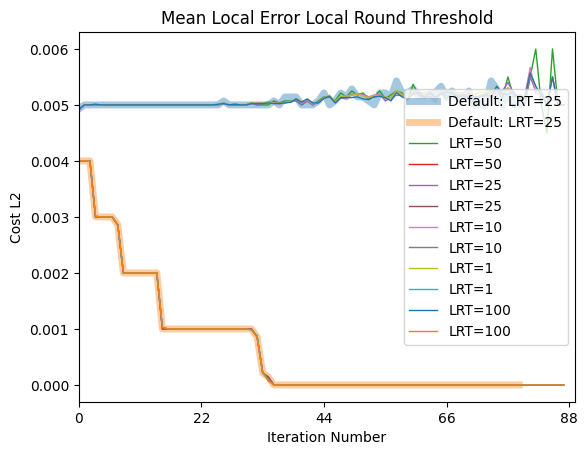

In [45]:
lrt_users, lrt_dfs, lrt_vecs = central_tendency_plotting([user_default, user_lrt50, user_lrt25, user_lrt10, user_lrt1, user_lrt100], 
                                                      highlight_default=True,
                                                      show_update_change=False,  
                                                      iterable_labels=['Default: LRT=25', 'LRT=50', 'LRT=25', 'LRT=10', 'LRT=1', 'LRT=100'], 
                                                      dim_reduc_factor=1, custom_title='Mean Local Error Local Round Threshold')

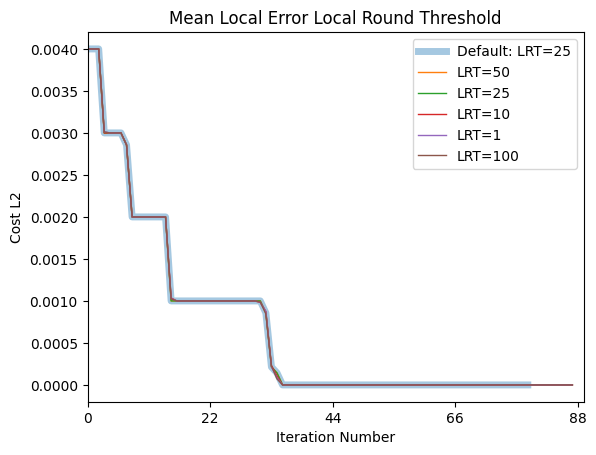

In [46]:
lrt_users, lrt_dfs, lrt_vecs = central_tendency_plotting([user_default, user_lrt50, user_lrt25, user_lrt10, user_lrt1, user_lrt100], 
                                                      global_error=False, 
                                                      highlight_default=True,
                                                      show_update_change=False,  
                                                      iterable_labels=['Default: LRT=25', 'LRT=50', 'LRT=25', 'LRT=10', 'LRT=1', 'LRT=100'], 
                                                      dim_reduc_factor=1, custom_title='Mean Local Error Local Round Threshold')

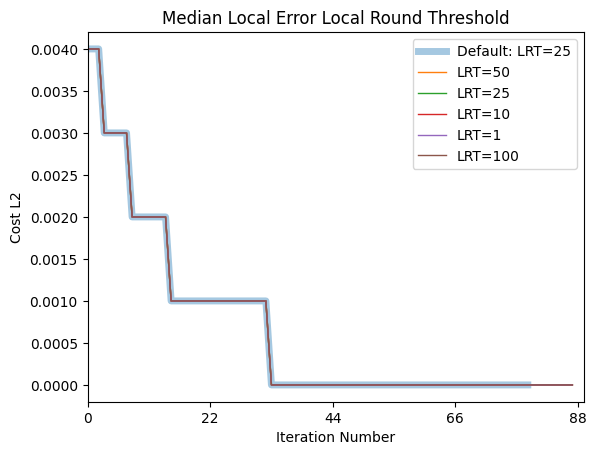

In [47]:
lrt_users, lrt_dfs, lrt_vecs = central_tendency_plotting([user_default, user_lrt50, user_lrt25, user_lrt10, user_lrt1, user_lrt100], 
                                                      global_error=False, 
                                                      plot_mean=False, 
                                                      plot_median=True, 
                                                      highlight_default=True,
                                                      show_update_change=False,  
                                                      iterable_labels=['Default: LRT=25', 'LRT=50', 'LRT=25', 'LRT=10', 'LRT=1', 'LRT=100'], 
                                                      dim_reduc_factor=1, custom_title='Median Local Error Local Round Threshold')

In [48]:
if run_all:
    pass
else:
    assert(1==0)

<hr>

# Increasing the number of scipy steps per iter
## 3 Scipy Steps

In [49]:
my_steps = 3

user_3ss = [Client(i, D_0_7, 'EtaScipyMinStep', cond0_training_and_labels_lst[i], 'streaming', num_steps=my_steps, delay_scaling=0) for i in range(14)]
global_3ss = Server(2, D_0_7, 'FedAvg', user_3ss)

for i in range(big_loop_iters):
    global_3ss.execute_FL_loop()
    
for my_client in global_3ss.all_clients:
    print((my_client.current_round, my_client.current_update))

(66, 12)
(77, 13)
(59, 12)
(64, 12)
(67, 12)
(78, 13)
(74, 12)
(77, 13)
(65, 12)
(83, 13)
(72, 12)
(76, 13)
(67, 12)
(75, 13)


## 5 Scipy Steps

In [50]:
my_steps = 5

user_5ss = [Client(i, D_0_7, 'EtaScipyMinStep', cond0_training_and_labels_lst[i], 'streaming', num_steps=my_steps, delay_scaling=0) for i in range(14)]
global_5ss = Server(2, D_0_7, 'FedAvg', user_5ss)

for i in range(big_loop_iters):
    global_5ss.execute_FL_loop()

## 10 Scipy Steps

In [51]:
my_steps = 10

user_10ss = [Client(i, D_0_7, 'EtaScipyMinStep', cond0_training_and_labels_lst[i], 'streaming', num_steps=my_steps, delay_scaling=0) for i in range(14)]
global_10ss = Server(2, D_0_7, 'FedAvg', user_10ss)

for i in range(big_loop_iters):
    global_10ss.execute_FL_loop()

## 20 Scipy Steps

In [52]:
my_steps = 20

user_20ss = [Client(i, D_0_7, 'EtaScipyMinStep', cond0_training_and_labels_lst[i], 'streaming', num_steps=my_steps, delay_scaling=0) for i in range(14)]
global_20ss = Server(2, D_0_7, 'FedAvg', user_20ss)

for i in range(big_loop_iters):
    global_20ss.execute_FL_loop()

## 50 Scipy Steps

In [53]:
my_steps = 50

user_50ss = [Client(i, D_0_7, 'EtaScipyMinStep', cond0_training_and_labels_lst[i], 'streaming', num_steps=my_steps, delay_scaling=0) for i in range(14)]
global_50ss = Server(2, D_0_7, 'FedAvg', user_50ss)

for i in range(big_loop_iters):
    global_50ss.execute_FL_loop()

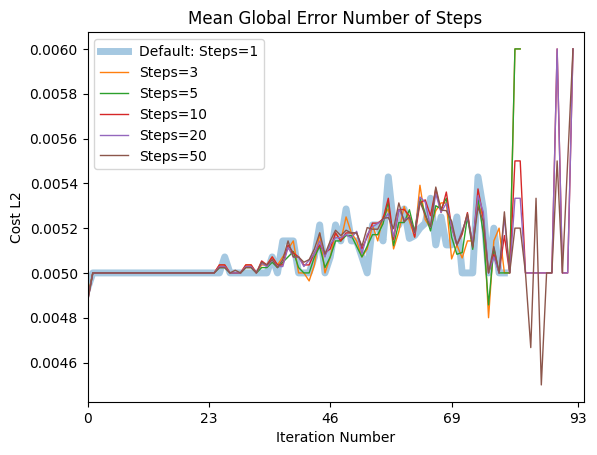

In [59]:
ss_users, ss_dfs, ss_vecs = central_tendency_plotting([user_default, user_3ss, user_5ss, user_10ss, user_20ss, user_50ss], 
                                                      local_error=False,
                                                      highlight_default=True,
                                                      show_update_change=False, 
                                                      iterable_labels=['Default: Steps=1', 'Steps=3', 'Steps=5', 'Steps=10', 'Steps=20', 'Steps=50'], 
                                                      dim_reduc_factor=1, custom_title='Mean Global Error Number of Steps')

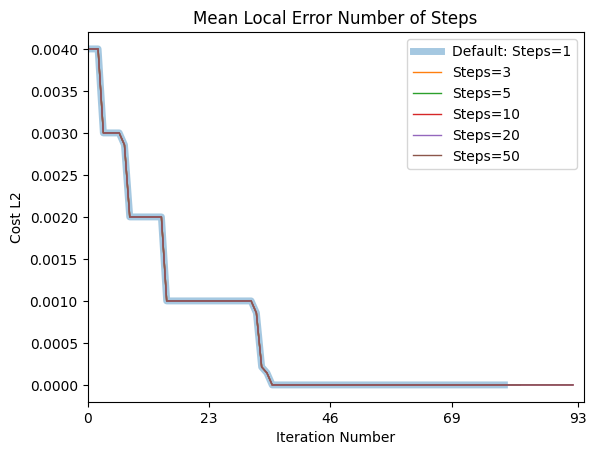

In [55]:
ss_users, ss_dfs, ss_vecs = central_tendency_plotting([user_default, user_3ss, user_5ss, user_10ss, user_20ss, user_50ss], 
                                                      global_error=False, 
                                                      highlight_default=True,
                                                      show_update_change=False, 
                                                      iterable_labels=['Default: Steps=1', 'Steps=3', 'Steps=5', 'Steps=10', 'Steps=20', 'Steps=50'], 
                                                      dim_reduc_factor=1, custom_title='Mean Local Error Number of Steps')

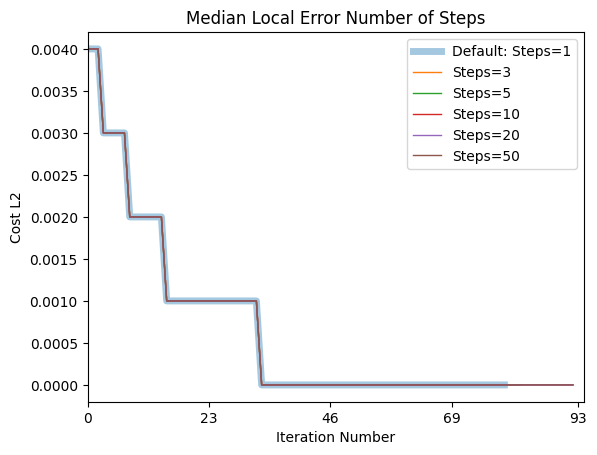

In [56]:
ss_users, ss_dfs, ss_vecs = central_tendency_plotting([user_default, user_3ss, user_5ss, user_10ss, user_20ss, user_50ss], 
                                                      global_error=False, 
                                                      plot_mean=False, 
                                                      plot_median=True,
                                                      highlight_default=True,
                                                      show_update_change=False, 
                                                      iterable_labels=['Default: Steps=1', 'Steps=3', 'Steps=5', 'Steps=10', 'Steps=20', 'Steps=50'], 
                                                      dim_reduc_factor=1, custom_title='Median Local Error Number of Steps')